## 1. 패키지 import

In [1]:
# import os 
import pandas as pd
import numpy as np
# import cv2
import matplotlib.pyplot as plt
# import datetime
from sklearn import tree
# import autokeras as ak
# import seaborn as sns
# import glob
# from PIL import Image
# from sklearn.utils import shuffle
import pickle
import joblib
from sklearn.metrics import mean_squared_error
from math import sqrt
# from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
# import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
# 데이터 불러오기
dd = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\prepro.csv', index_col=0)
dd

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


In [3]:
# info 확인
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50094 entries, 2021-09-06 16:29:54.000 to 2021-10-27 18:36:23.300
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Voltage  50094 non-null  float64
 4   DTime    50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ MB


In [4]:
dedicated_data = dd.copy()
dedicated_data

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


## 2. 학습, 평가 데이터 준비

In [5]:
# Lot List 추출
lot_lists = dedicated_data['Lot'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


In [6]:
# Data List 추출
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


In [7]:
# Error Data Read
error = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\Error Lot list.csv')
error.head()

,0,1,2
0,2021-09-06,NaN,NaN
1,2021-09-07,NaN,NaN
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
4,2021-09-10,NaN,NaN


In [8]:
# null값이 2개 이상인 행 제거
# thresh : 임계값 설정
error_drop = error.dropna(thresh=2)
error_drop

,0,1,2
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
8,2021-09-16,4.0,NaN
13,2021-09-28,16.0,NaN
16,2021-10-01,21.0,NaN
18,2021-10-06,6.0,NaN
29,2021-10-22,3.0,NaN
30,2021-10-25,16.0,NaN


In [9]:
# Process Data List 추출
lot_error_lists = []
lot_error_lists1 = error_drop['1'].unique().tolist()
# nan이 아닌 값만 list에 담기
lot_error_lists2 = error_drop['2'].unique()[~np.isnan(error_drop['2'].unique())].tolist()
lot_error_lists = lot_error_lists1 + lot_error_lists2

lot_error_lists = list(map(int, lot_error_lists))
d_error_lists = error_drop['0'].unique()
print("Unique LoT List : ", lot_error_lists)
print("Unique Date List : ", d_error_lists)

Unique LoT List :  [20, 16, 4, 21, 6, 3, 5]
Unique Date List :  ['2021-09-08' '2021-09-09' '2021-09-16' '2021-09-28' '2021-10-01'
 '2021-10-06' '2021-10-22' '2021-10-25']


### Train/Test Data Set Make 

In [10]:
# 학습용 데이터 프레임 생성
X_data = pd.DataFrame(columns={'pH', 'Temp', 'Voltage', 'QC'})

In [ ]:
# 두 개의 데이터 프레임에서 필요한 부분만 합침
for d in d_lists:
    for lot in lot_lists:
        tmp = dd[(dd['DTime']==d) & (dd['Lot']==lot)]
        tmp = tmp[['pH', 'Temp', 'Voltage']]
        error_df = error_drop[(error_drop['0']==d) & ((error_drop['1']==lot) | (error_drop['2']==lot))]
        len_error = len(error_df)
        if len_error > 0:
            # np.full : 선언한 행렬에 특정 숫자 or 문자를 모든 값에 입력
            # tmp['pH'].shape => (69,)
            trr = np.full((tmp['pH'].shape), 0)
        else:
            trr = np.full((tmp['pH'].shape), 1)
        tmp['QC'] = trr
        X_data = X_data.append(tmp)
X_data=X_data.apply(pd.to_numeric)

In [12]:
# Training Data
X_data

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65
...,...,...,...,...
2021-10-27 18:36:03.300,1,15.38,2.05,42.84
2021-10-27 18:36:08.300,1,19.08,1.91,42.64
2021-10-27 18:36:13.300,1,18.14,2.11,44.09
2021-10-27 18:36:18.300,1,17.96,1.92,43.95


In [13]:
# 최종 데이터프레임 저장
# X_data.to_csv(r'C:\localRepository\Bigdata_busan\ML\res\final_df.csv')

In [16]:
# # csv 불러오기
# X_data = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\final_df.csv', index_col=0)
# X_data

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65
...,...,...,...,...
2021-10-27 18:36:03.300,1,15.38,2.05,42.84
2021-10-27 18:36:08.300,1,19.08,1.91,42.64
2021-10-27 18:36:13.300,1,18.14,2.11,44.09
2021-10-27 18:36:18.300,1,17.96,1.92,43.95


In [17]:
# 데이터 요약
X_data.describe()

,QC,Voltage,pH,Temp
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,0.987603,17.452394,2.008331,42.454195
std,0.110649,1.458218,0.123021,1.471800
min,0.000000,10.230000,1.810000,33.140000
25%,1.000000,16.300000,1.910000,41.300000
50%,1.000000,17.480000,2.010000,42.480000
75%,1.000000,18.640000,2.100000,43.650000
max,1.000000,19.990000,2.490000,44.990000


In [18]:
# 상관관계 파악
X_data.corr()
# 데이터별 상관관계가 없다

,QC,Voltage,pH,Temp
QC,1.000000,0.012254,-0.013707,0.007044
Voltage,0.012254,1.000000,-0.030503,0.022263
pH,-0.013707,-0.030503,1.000000,-0.032165
Temp,0.007044,0.022263,-0.032165,1.000000


In [19]:
# train
train_np = X_data[['Temp', 'Voltage', 'pH']].to_numpy()
train_np

array([[43.15, 19.74,  2.15],
       [40.13, 18.01,  2.08],
       [43.46, 18.73,  2.18],
       ...,
       [44.09, 18.14,  2.11],
       [43.95, 17.96,  1.92],
       [44.11, 19.22,  1.81]])

In [20]:
# target
target_np = X_data['QC'].to_numpy()
target_np

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
# 학습용/ 검증용/ 테스트용 데이터 생성(60:20:20)
# 1. 학습, 테스트 80:20 으로 나눔
train_input, test_input, train_target, test_target= train_test_split(train_np, target_np, random_state=42, test_size=0.2)

In [22]:
# 2. 학습 -> 학습, 검증 75:25 로 나눔
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, random_state=42, test_size=0.25)

In [23]:
train_input.shape

(30056, 3)

In [25]:
test_input.shape

(10019, 3)

In [27]:
val_input.shape

(10019, 3)

## 모델링

In [29]:
# Decision Tree 모델 모델링
model_1 = tree.DecisionTreeClassifier(max_depth=5)
# 별다른 Hyper-Parameter를 사용하지 않아서 최대의 결과가 나올 수 있도록 모든 제한을 풀어둔 모델이 생성될 것이다

## 모델 훈련

### Decision Tree 모델 학습

In [30]:
len(train_input)

30056

In [31]:
len(train_target)

30056

In [32]:
# Input Data, Output Data
clf = model_1.fit(train_input, train_target)

In [33]:
clf

DecisionTreeClassifier(max_depth=5)

In [34]:
# 훈련 정확도
clf.score(train_input, train_target)

0.9879225445834442

In [35]:
# 검증 정확도
# 훈련/테스트로만 했을 때보다 훈련/검증/테스트로 했을 때 검중 정확도가 0.0001 증가했다
clf.score(val_input, val_target)

0.9876235153208903

### Decision Tree 모델 시각화

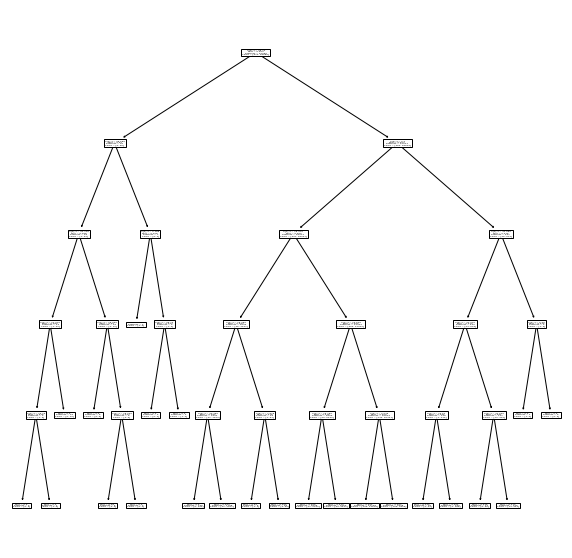

In [36]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()
# 복잡한 모델이 생성된 것을 확인

## 모델 튜닝

- 튜닝 시 사용할 수 있는 Hyper-Parameter에는 max_depth, min_samples_split, max_leaf_nodes가 있다

- depth 3으로 튜닝한 결과 과적합이 발생해서 **원래의 depth 5 모델을 채택**

In [37]:
# max_depth를 3으로 변경하여 튜닝 및 학습 진행
model_3 = tree.DecisionTreeClassifier(max_depth=3)
new_clf = model_3.fit(train_input, train_target)

In [38]:
new_clf

DecisionTreeClassifier(max_depth=3)

In [39]:
# 훈련 정확도
new_clf.score(train_input, train_target)

0.9877894596752729

In [40]:
# 검증 정확도
new_clf.score(val_input, val_target)

0.9879229464018365

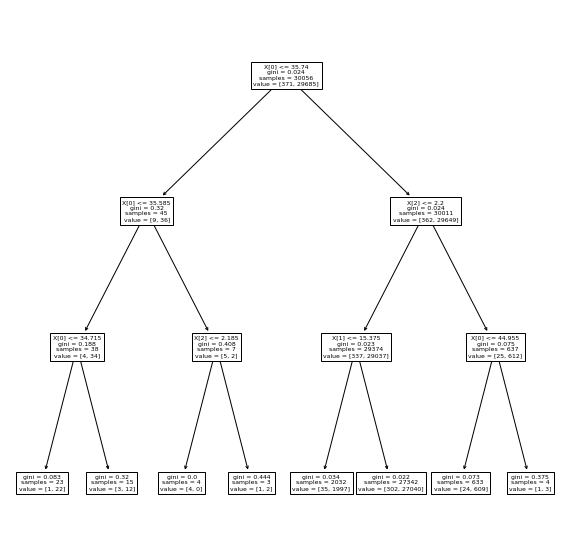

In [41]:
plt.figure(figsize=(10,10))
tree.plot_tree(new_clf)
plt.show()

## 모델 평가 및 해석

In [42]:
clf_pred = clf.predict(test_input)
print('Decision Tree Model Predict : ', clf_pred)
rmse = sqrt(mean_squared_error(test_target, clf_pred))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [1 1 1 ... 1 1 1]
Decision Tree Model RMSE :  0.1147822615286565


In [56]:
# 테스트 정확도
accuracy_score(test_target, clf_pred)

0.9868250324383671

### 직접  정확도 검증

In [43]:
# test_target 과 clf_pred 의 값이 일치하면 val에 1 대입, 불일치면 0 대입
tmp_df = pd.DataFrame(columns=['test_y','pred_y','val'])
tmp_df['test_y'] = test_target
tmp_df['pred_y'] = clf_pred
tmp_df['val'] = 0
tmp_df.loc[(tmp_df['test_y']==tmp_df['pred_y']), 'val'] = 1
# tmp_df['test_y']!=tmp_df['pred_y']

In [44]:
tmp_df[(tmp_df['val']==0)]

,test_y,pred_y,val
166,0,1,0
270,0,1,0
285,0,1,0
487,0,1,0
507,0,1,0
...,...,...,...
9825,0,1,0
9854,0,1,0
9873,0,1,0
9880,0,1,0


In [45]:
# 오차율
len(tmp_df[(tmp_df['val']==0)])/len(tmp_df)

0.013174967561632897

In [46]:
# 정확도
len(tmp_df[(tmp_df['val']==1)])/len(tmp_df)
# 도출된 정확도와 일치하는 것 확인 가능

0.9868250324383671

### 모델 평가

In [50]:
'''
    - accuracy(정분류율) : 실제 분류 범주를 정확하게 예측한 비율
    - recall(재현율)=민감도 : 참 긍정률
    - precision(정확도, 정밀도) : 'positive'으로 예측한 비율 중에서 실제로 'positive'(TP)인 비율
    - F1 : 정밀도와 민감도(재현율)를 하나로 합한 성능평가 지표
            정밀도와 민감도 양쪽이 모두 클 때 큰 값을 가짐
'''
print("accuracy = ", accuracy_score(test_target, clf_pred))
print("recall = ", recall_score(test_target, clf_pred))
print("precision = ", precision_score(test_target, clf_pred))
print("f1 score = ", f1_score(test_target, clf_pred))

accuracy =  0.9868250324383671
recall =  0.9995955510616784
precision =  0.9872178949470741
f1 score =  0.9933681672025723


In [51]:
# confusion matrix 도출
def get_confusion_matrix_values(y_true, clf_pred):
 cm = confusion_matrix(y_true, clf_pred)
 return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TP, FP, FN, TN = get_confusion_matrix_values(test_target, clf_pred)
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)

TP :  1
FP :  128
FN :  4
TN :  9886


In [52]:
cm = confusion_matrix(test_target, clf_pred)
print(cm)

[[   1  128]
 [   4 9886]]


In [53]:
# roc_curve
if (TP+FN) == 0:
 tpr_val = 0
else:
 tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
 fpr_val = 0
else:
 fpr_val = TN / (TN+FP)
print(tpr_val, fpr_val)
tpr, fpr, _ = roc_curve(test_target, clf_pred)
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
 tpr = np.append(tpr, 1)
 fpr = np.append(fpr, 1)
print(fpr, tpr)

0.2 0.9872178949470741
[0.         0.98721789 1.        ] [0.  0.2 1. ]


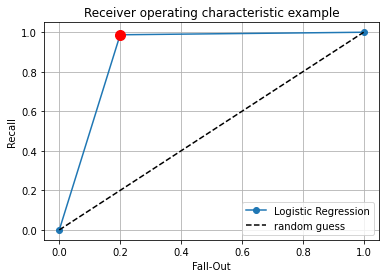

In [54]:
# roc_curve 시각화
plt.plot(tpr, fpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([tpr_val], [fpr_val], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

In [55]:
# 모델 검토 값 요약 정리
print(classification_report(test_target, clf_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.20      0.01      0.01       129
     class 1       0.99      1.00      0.99      9890

    accuracy                           0.99     10019
   macro avg       0.59      0.50      0.50     10019
weighted avg       0.98      0.99      0.98     10019



## 모델 저장

In [140]:
# 모델 변수에 담기
saved_model = pickle.dumps(clf)

In [142]:
# 
clf_from_pickle = pickle.loads(saved_model)

In [143]:
clf_from_pickle.predict(test_input)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [144]:
joblib.dump(clf, 'DT_model.pkl')

['DT_model.pkl']

In [145]:
clf_from_joblib = joblib.load('DT_model.pkl')
clf_from_joblib.predict(test_input)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)